<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:Parmida Oujaghi

**Student ID**: 400100779



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [1]:
## Import necessary libraries here ##
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.linear_model import RidgeCV, LassoCV

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [2]:
# Input variables:
# 1) CRIM: per capita crime rate by town
# 2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# 3) INDUS: proportion of non-retail business acres per town
# 4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# 5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
# 6) RM: average number of rooms per dwelling
# 7) AGE: proportion of owner-occupied units built prior to 1940
# 8) DIS: weighted distances to five Boston employment centres
# 9) RAD: index of accessibility to radial highways
# 10) TAX: full-value property-tax rate per $10,000 [$/10k]
# 11) PTRATIO: pupil-teacher ratio by town
# 12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of [people of African American descent] by town
# 13) LSTAT: % lower status of the population

# Output variable:
# 1) MEDV: Median value of owner-occupied homes in $1000's [k$] 

#shape: 507 * 14

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [3]:
# read the dataset
df = pd.read_csv('C:/Users/Parmida Oujaghi/Desktop/IML_CHW2/Q1/Boston.csv')
 
# get the locations
# last column is target others are features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

reg = LinearRegression()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
preds = reg.predict(X_test)
print("R2 score : %.2f" % r2_score(y_test,preds))
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test,preds)))

Coefficients: 
 [-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]
R2 score : 0.67
Root Mean squared error: 5.21


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [4]:
alphas = 10 ** np.linspace(3,-3,100)*0.5

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

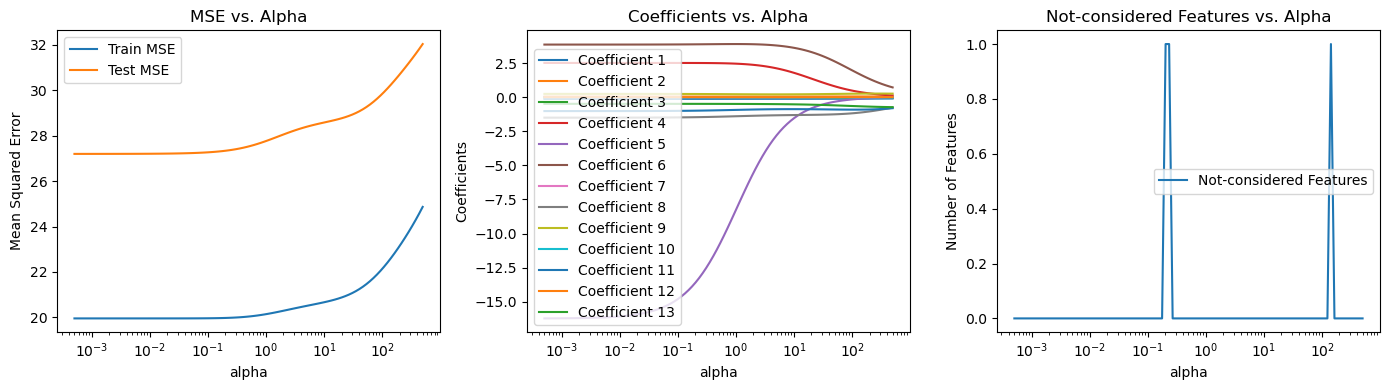

The best alpha value is: 0.05748784976988678
Coefficients: 
 [-1.20983420e-01  4.46372940e-02  7.87580902e-03  2.51129769e+00
 -1.53765409e+01  3.86526195e+00 -1.08557437e-02 -1.48922587e+00
  2.39498592e-01 -1.11274348e-02 -1.00839393e+00  6.86271147e-03
 -4.87355849e-01]
R2 score : 0.67
Root Mean squared error: 5.22


In [5]:
## Write your code here ##

train_errors = []
test_errors = []
coefficients = []
num_not_considered_features = []

# Loop over alphas
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    
    # Store coefficients
    coefficients.append(ridge.coef_)
    
    # Calculate and store MSE
    train_errors.append(mean_squared_error(y_train, ridge.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, ridge.predict(X_test)))
    
    # Count and store the number of not considered features (close to zero coefficients)
    num_not_considered_features.append(np.sum(np.abs(ridge.coef_) < 1e-3))

# Plotting MSE for train and test versus alpha
plt.figure(figsize=(14, 4))

plt.subplot(131)
plt.plot(alphas, train_errors, label='Train MSE')
plt.plot(alphas, test_errors, label='Test MSE')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Alpha')
plt.legend()

# Plotting coefficients versus alpha
plt.subplot(132)
coefficients = np.array(coefficients)
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=f'Coefficient {i+1}')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Coefficients vs. Alpha')
plt.legend()

# Plotting number of not-considered features versus alpha
plt.subplot(133)
plt.plot(alphas, num_not_considered_features, label='Not-considered Features')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Number of Features')
plt.title('Not-considered Features vs. Alpha')
plt.legend()

plt.tight_layout()
plt.show()



ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)

# Fit the model to the training data
ridge_cv.fit(X_train, y_train)

# The best alpha value after cross-validation
best_alpha = ridge_cv.alpha_
print(f"The best alpha value is: {best_alpha}")

print('Coefficients: \n', ridge_cv.coef_)
predsridge = ridge_cv.predict(X_test)
print("R2 score : %.2f" % r2_score(y_test,predsridge))
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test,predsridge)))

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

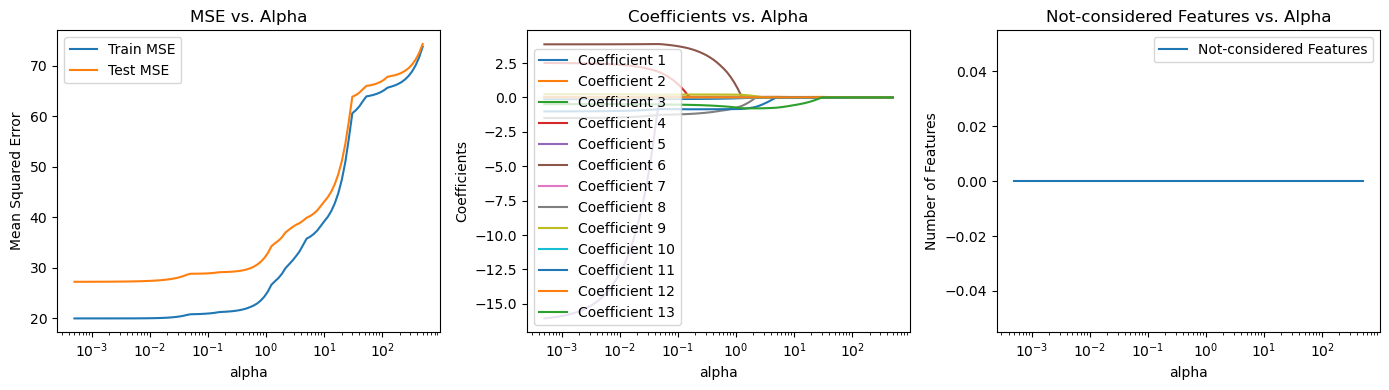

The best alpha value is: 0.0005
Coefficients: 
 [-1.21235657e-01  4.44962688e-02  1.06344733e-02  2.50436833e+00
 -1.60577371e+01  3.85924824e+00 -1.01384515e-02 -1.49782362e+00
  2.41634077e-01 -1.10840758e-02 -1.01588666e+00  6.82512467e-03
 -4.86963151e-01]
R2 score : 0.67
Root Mean squared error: 5.22


In [6]:
lasso_train_errors = []
lasso_test_errors = []
lasso_coefficients = []
lasso_num_not_considered_features = []

# Loop over alphas
for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    
    # Store coefficients
    lasso_coefficients.append(lasso.coef_)
    
    # Calculate and store MSE
    lasso_train_errors.append(mean_squared_error(y_train, lasso.predict(X_train)))
    lasso_test_errors.append(mean_squared_error(y_test, lasso.predict(X_test)))
    
    # Count and store the number of not considered features (close to zero coefficients)
    lasso_num_not_considered_features.append(np.sum(np.abs(ridge.coef_) < 1e-3))

# Plotting MSE for train and test versus alpha
plt.figure(figsize=(14, 4))

plt.subplot(131)
plt.plot(alphas, lasso_train_errors, label='Train MSE')
plt.plot(alphas, lasso_test_errors, label='Test MSE')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Alpha')
plt.legend()

# Plotting coefficients versus alpha
plt.subplot(132)
lasso_coefficients = np.array(lasso_coefficients)
for i in range(lasso_coefficients.shape[1]):
    plt.plot(alphas, lasso_coefficients[:, i], label=f'Coefficient {i+1}')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Coefficients vs. Alpha')
plt.legend()

# Plotting number of not-considered features versus alpha
plt.subplot(133)
plt.plot(alphas, lasso_num_not_considered_features, label='Not-considered Features')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Number of Features')
plt.title('Not-considered Features vs. Alpha')
plt.legend()

plt.tight_layout()
plt.show()


lasso_cv = LassoCV(alphas=alphas, max_iter=10000, cv=5)

# Fit the model to the training data
lasso_cv.fit(X_train, y_train)

# The best alpha value after cross-validation
best_alpha = lasso_cv.alpha_
print(f"The best alpha value is: {best_alpha}")

print('Coefficients: \n', lasso_cv.coef_)
predslasso = lasso_cv.predict(X_test)
print("R2 score : %.2f" % r2_score(y_test,predslasso))
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test,predslasso)))

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

For the linear regression model, the R2 score might increase with more training data, but only to a certain point, after which it may plateau, indicating that adding more data doesn’t improve the model.
The ridge and lasso regression models will also show an increase in R2 score with more data, but due to regularization, they might handle overfitting better than linear regression, especially when the ratio of training data is high.

The selected alpha value in ridge regression decreases as the ratio of training data increases because the model complexity needs to be reduced to prevent overfitting.
Similarly, for lasso regression, the alpha value might show a decreasing trend with more data, as lasso could eliminate unnecessary features by setting their coefficients to zero, simplifying the model.

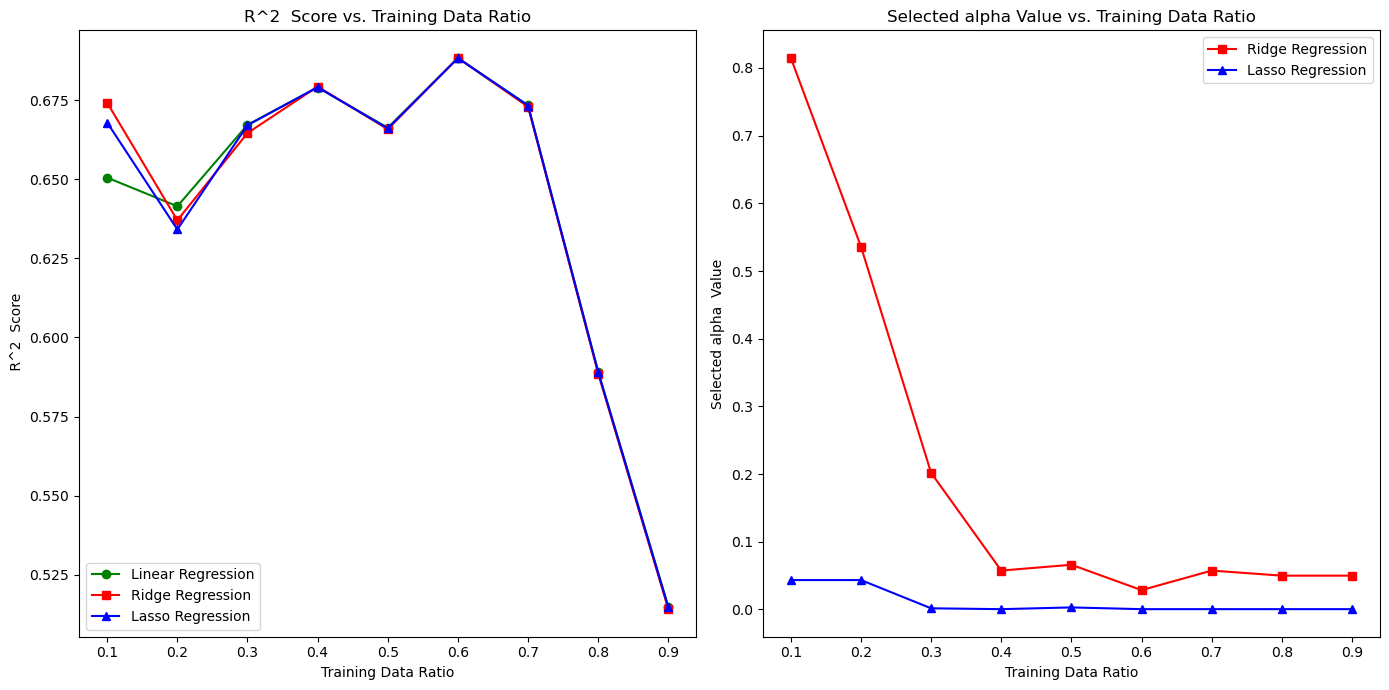

In [9]:
# Define the range of training data ratios
training_data_ratios = np.linspace(0.1, 0.9, 9)

# Initialize lists to store results
r2_scores_linear = []
r2_scores_ridge = []
r2_scores_lasso = []
alpha_ridge = []
alpha_lasso = []

# Loop over the training data ratios
for ratio in training_data_ratios:
    # Split the dataset according to the current ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=0)
    
    # Linear Regression
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    preds = reg.predict(X_test)
    r2_scores_linear.append(r2_score(y_test, preds))
    
    # Ridge Regression with Cross-Validation
    ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
    ridge_cv.fit(X_train, y_train)
    preds_ridge = ridge_cv.predict(X_test)
    r2_scores_ridge.append(r2_score(y_test, preds_ridge))
    alpha_ridge.append(ridge_cv.alpha_)
    
    # Lasso Regression with Cross-Validation
    lasso_cv = LassoCV(alphas=alphas, max_iter=10000, cv=5)
    lasso_cv.fit(X_train, y_train)
    preds_lasso = lasso_cv.predict(X_test)
    r2_scores_lasso.append(r2_score(y_test, preds_lasso))
    alpha_lasso.append(lasso_cv.alpha_)


# Plot the $$ R^2 $$ scores
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.plot(training_data_ratios, r2_scores_linear, label='Linear Regression', marker='o', color = 'green')
plt.plot(training_data_ratios, r2_scores_ridge, label='Ridge Regression', marker='s', color = 'red')
plt.plot(training_data_ratios, r2_scores_lasso, label='Lasso Regression', marker='^', color = 'blue')
plt.xlabel('Training Data Ratio')
plt.ylabel(' R^2  Score')
plt.title('R^2  Score vs. Training Data Ratio')
plt.legend()

# Plot the selected $$ \alpha $$ values
plt.subplot(122)
plt.plot(training_data_ratios, alpha_ridge, label='Ridge Regression', marker='s', color = 'red')
plt.plot(training_data_ratios, alpha_lasso, label='Lasso Regression', marker='^', color = 'blue')
plt.xlabel('Training Data Ratio')
plt.ylabel('Selected alpha  Value')
plt.title('Selected alpha Value vs. Training Data Ratio')
plt.legend()

plt.tight_layout()
plt.show()
